#### Gramener Case Study

#### Dhruvil Panchamia

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Cleaning

##### Loading the Data

In [5]:
df = pd.read_csv('loan.csv', low_memory=False)

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
df.shape

(39717, 111)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


##### Dropping Columns with more than 90% null values

In [14]:
columns_to_drop = df.columns[df.isnull().sum()/len(df)*100 > 90]
df.drop(columns=columns_to_drop, inplace=True)

In [16]:
df.shape

(39717, 55)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

##### Convert Data Type of some Columns

In [21]:
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)

df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)

df['term'] = df['term'].str.extract(r'(\d+)').astype(float)

categorical_columns = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], format='%b-%y', errors='coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  float64       
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  category      
 9   sub_grade                   39717 non-null  category      
 10  emp_title                   37258 non-null  object        
 11  emp_length                  38642 non-null  category  

##### Handling Missing Values
###### Fill numeric columns with the median and categorical with mode

In [26]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.median()), axis=0)
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]), axis=0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  float64       
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  category      
 9   sub_grade                   39717 non-null  category      
 10  emp_title                   39717 non-null  object        
 11  emp_length                  39717 non-null  category  

### Univariate Analysis

#### Continuous Variables

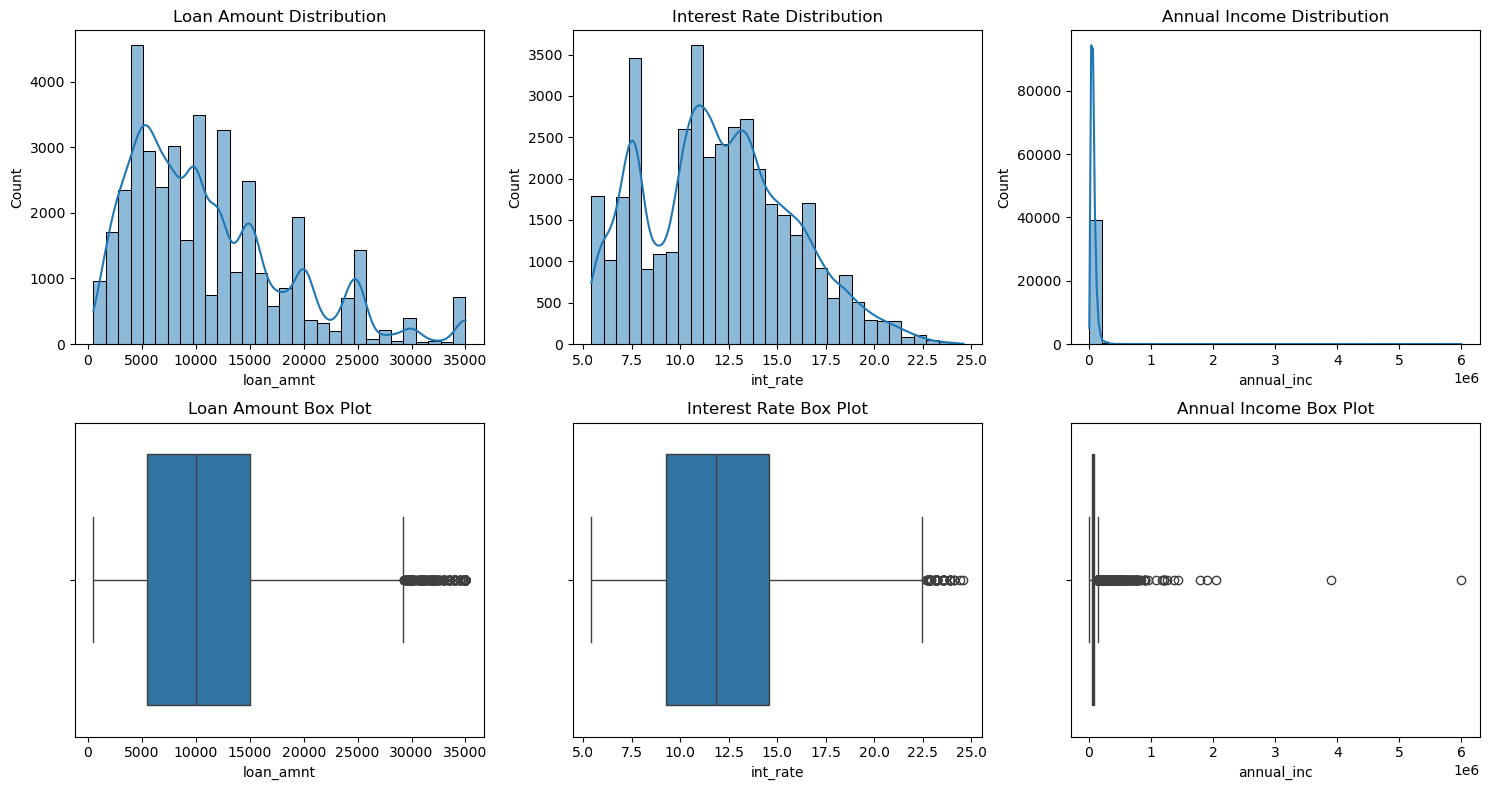

In [32]:
plt.figure(figsize=(15, 8))

# Histogram for Loan Amount
plt.subplot(2, 3, 1)
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title('Loan Amount Distribution')

# Box Plot for Loan Amount
plt.subplot(2, 3, 4)
sns.boxplot(x=df['loan_amnt'])
plt.title('Loan Amount Box Plot')

# Histogram for Interest Rate
plt.subplot(2, 3, 2)
sns.histplot(df['int_rate'], bins=30, kde=True)
plt.title('Interest Rate Distribution')

# Box Plot for Interest Rate
plt.subplot(2, 3, 5)
sns.boxplot(x=df['int_rate'])
plt.title('Interest Rate Box Plot')

# Histogram for Annual Income
plt.subplot(2, 3, 3)
sns.histplot(df['annual_inc'], bins=30, kde=True)
plt.title('Annual Income Distribution')

# Box Plot for Annual Income
plt.subplot(2, 3, 6)
sns.boxplot(x=df['annual_inc'])
plt.title('Annual Income Box Plot')

plt.tight_layout()
plt.show()

#### Categorical Variables

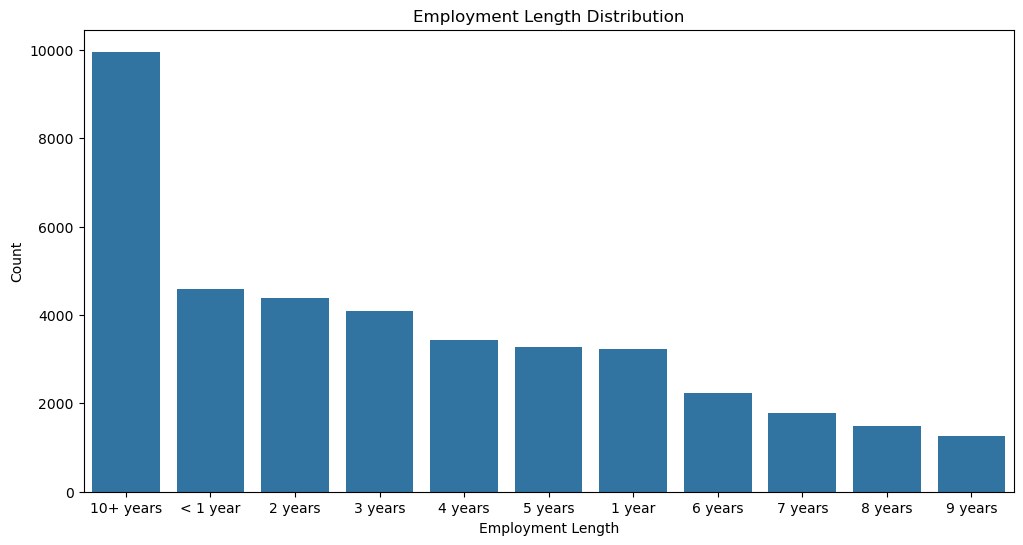

In [34]:
# Bar chart for Employement Length Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='emp_length', order=df['emp_length'].value_counts().index)
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.show()

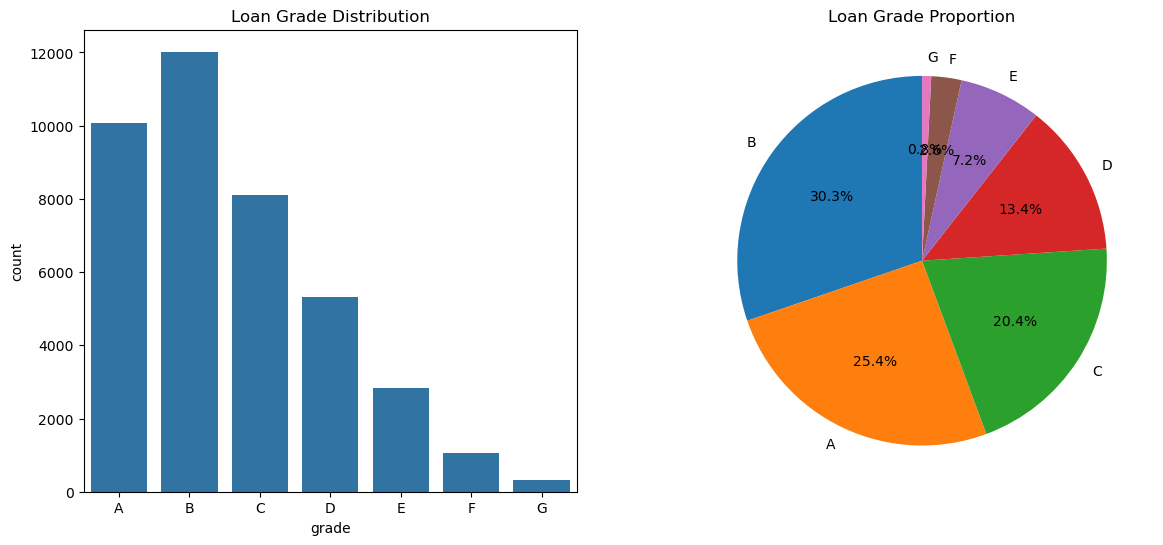

In [37]:
plt.figure(figsize=(14, 6))

# Bar Chart for Loan Grade
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='grade', order=sorted(df['grade'].unique()))
plt.title('Loan Grade Distribution')

# Pie Chart for Loan Grade
plt.subplot(1, 2, 2)
df['grade'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Loan Grade Proportion')
plt.ylabel('')  

plt.show()

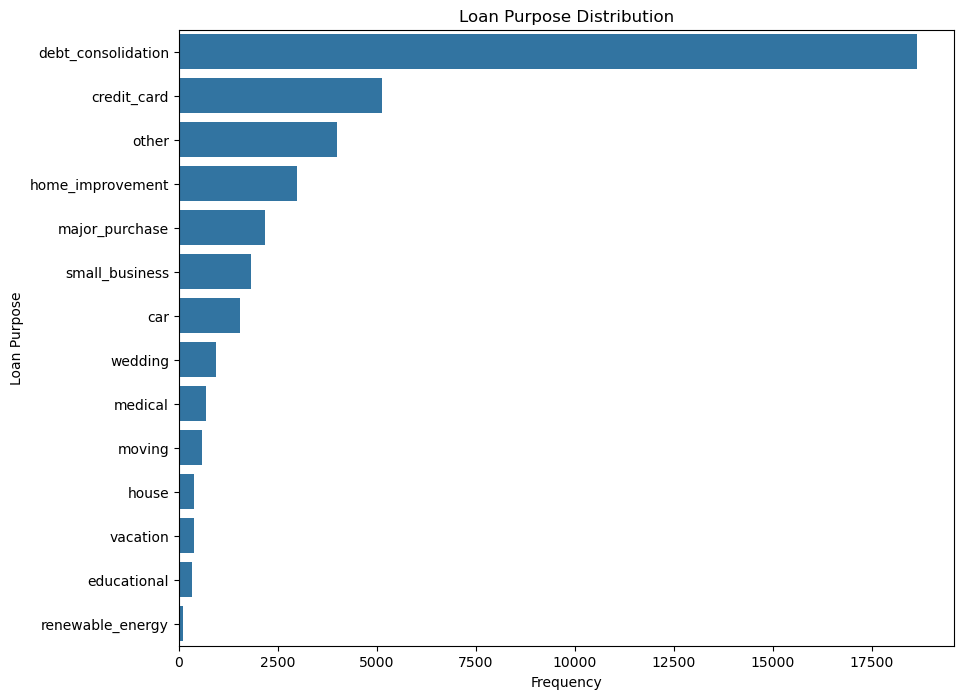

In [39]:
# Bar chart for Loan Purpose Distribution
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='purpose', order=df['purpose'].value_counts().index)
plt.title('Loan Purpose Distribution')
plt.xlabel('Frequency')
plt.ylabel('Loan Purpose')
plt.show()


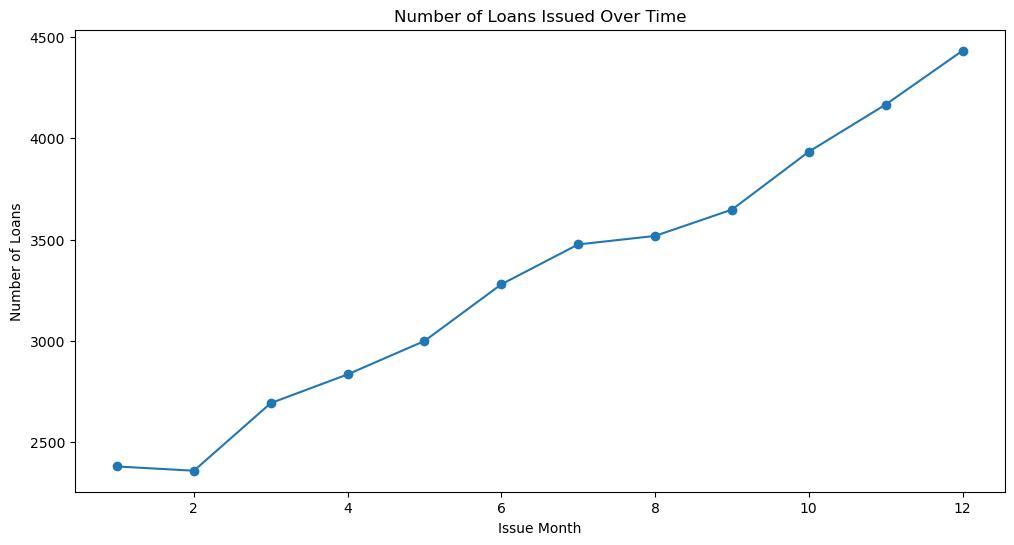

In [41]:
# Line chart for trend of Number of loans over month
df['issue_month'] = df['issue_d'].dt.month
loan_issued_by_month = df.groupby('issue_month').size()
loan_issued_by_month
plt.figure(figsize=(12, 6))
loan_issued_by_month.plot(kind='line', marker='o')
plt.title('Number of Loans Issued Over Time')
plt.xlabel('Issue Month')
plt.ylabel('Number of Loans')
plt.show()


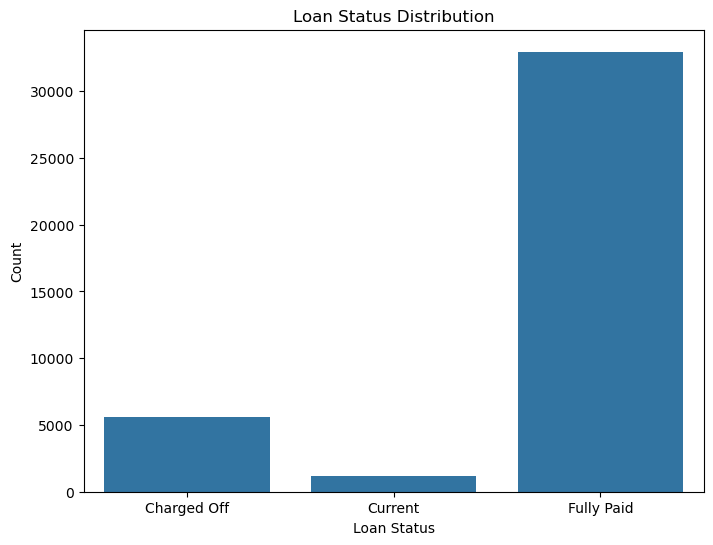

In [43]:
# Bar chart for Loan status distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


#### Segmented Univariate Analysis

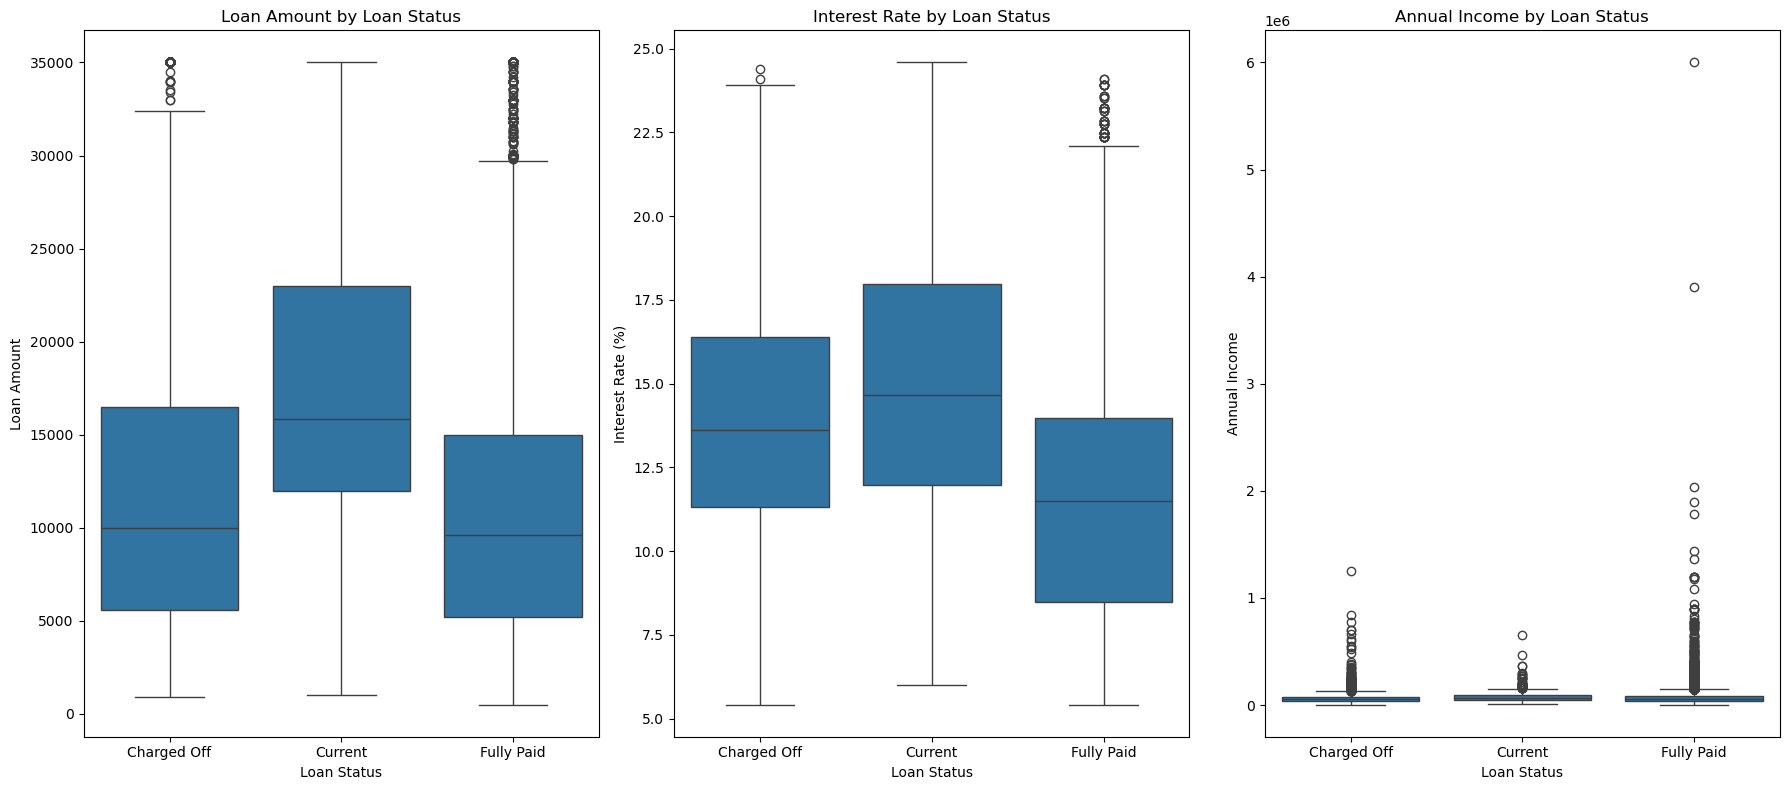

In [46]:
plt.figure(figsize=(18, 8))

# Loan Amount by Loan Status
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='loan_status', y='loan_amnt')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

# Interest Rate by Loan Status
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='loan_status', y='int_rate')
plt.title('Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')

# Annual Income by Loan Status
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='loan_status', y='annual_inc')
plt.title('Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')

plt.tight_layout()
plt.show()


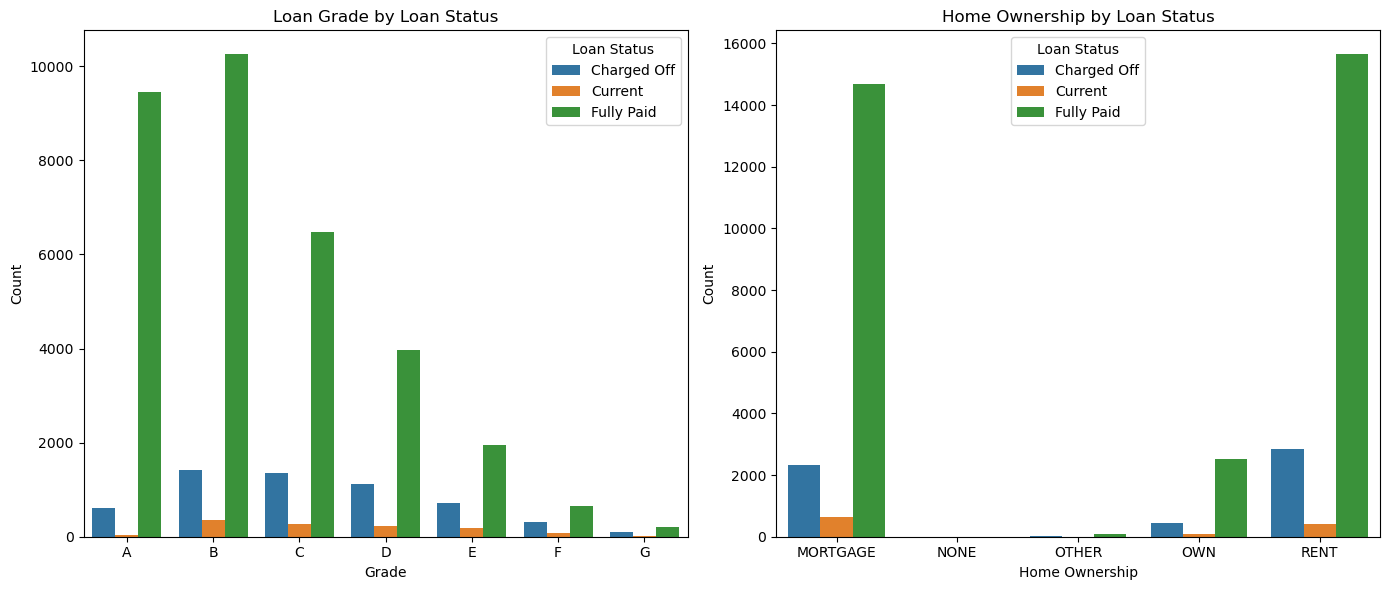

In [48]:
plt.figure(figsize=(14, 6))

# Loan Grade by Loan Status
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='grade', hue='loan_status')
plt.title('Loan Grade by Loan Status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')

# Home Ownership by Loan Status
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='home_ownership', hue='loan_status')
plt.title('Home Ownership by Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper center')

plt.tight_layout()
plt.show()


### Bivariate Analysis

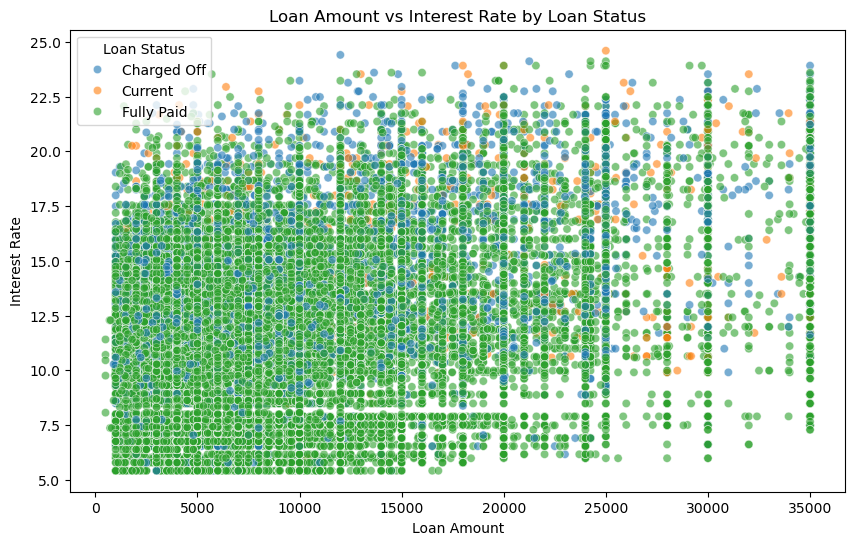

In [51]:
# Scatter Plot: Loan Amount vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loan_amnt', y='int_rate', hue='loan_status', alpha=0.6)
plt.title('Loan Amount vs Interest Rate by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.legend(title='Loan Status')
plt.show()

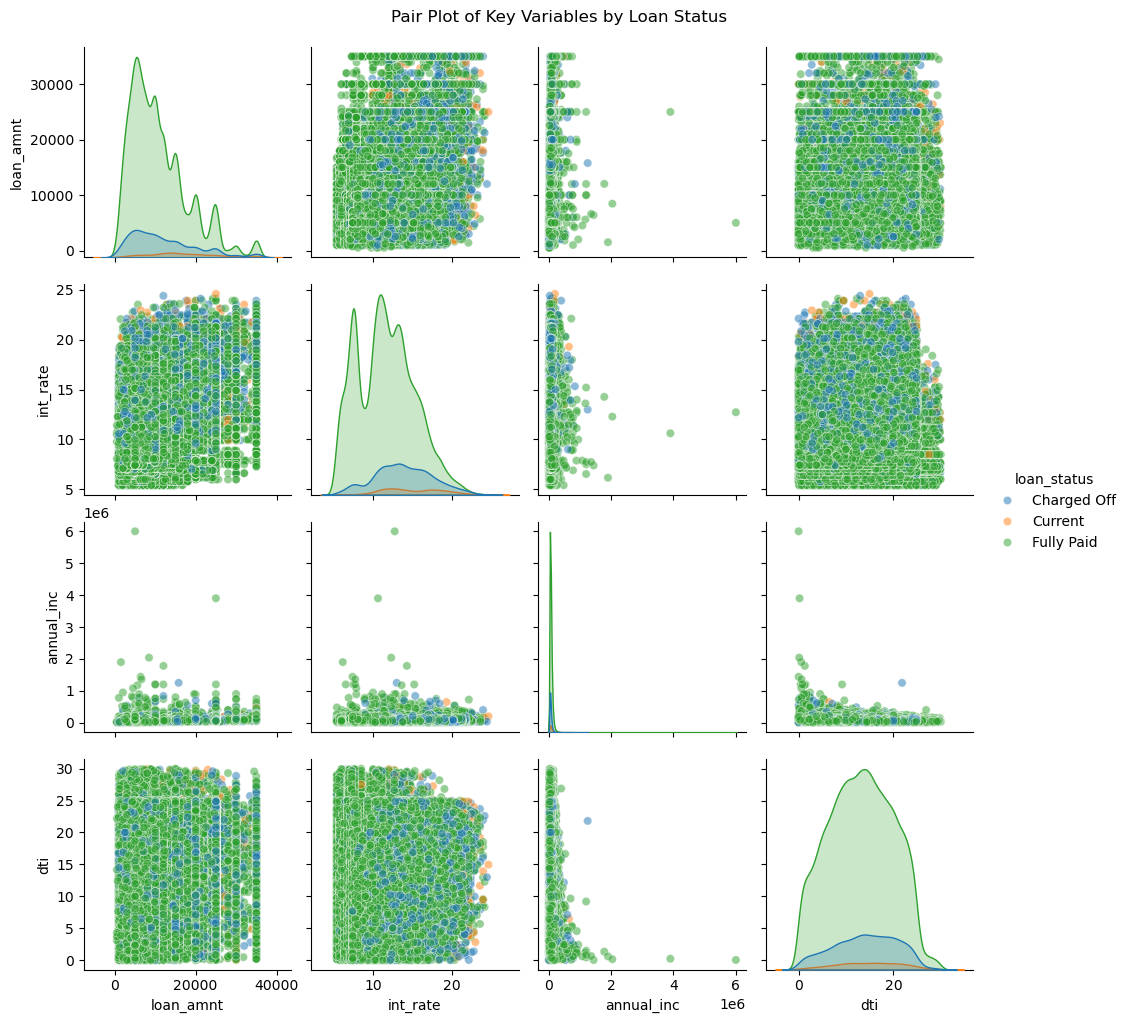

In [53]:
# Pair Plot: Loan Amount, Interest Rate, Annual Income and Debt-to-Income Ratio by Loan Status
features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
sns.pairplot(df, vars=features, hue='loan_status', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Key Variables by Loan Status', y=1.02)
plt.show()


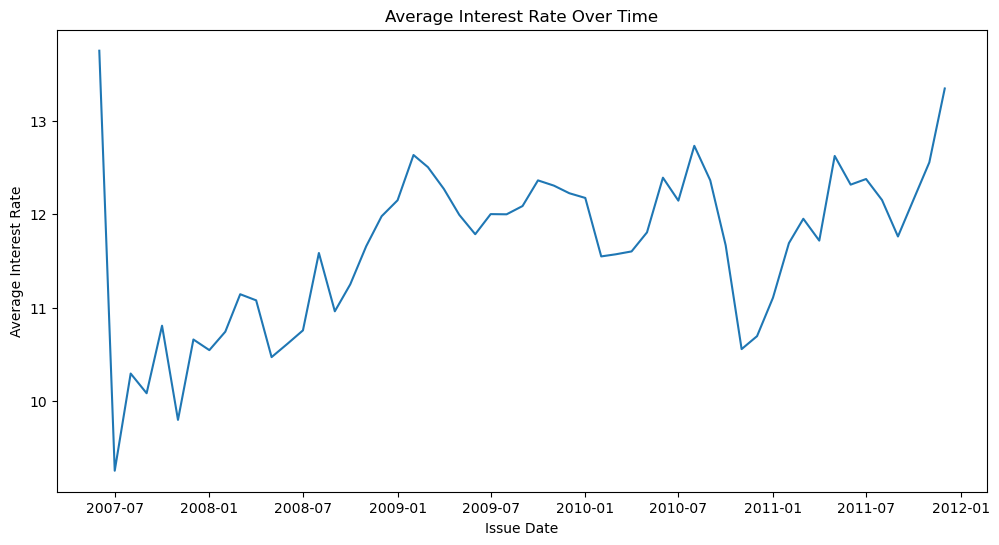

In [54]:
# Line Plot: Average Interest Rate over Time

# Calculate monthly average interest rate
monthly_int_rate = df.groupby('issue_d')['int_rate'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_int_rate, x='issue_d', y='int_rate')
plt.title('Average Interest Rate Over Time')
plt.xlabel('Issue Date')
plt.ylabel('Average Interest Rate')
plt.show()


C:\Users\dhruv\AppData\Local\Temp\ipykernel_11204\2423117527.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_status = df.groupby(['grade', 'loan_status']).size().unstack().fillna(0)


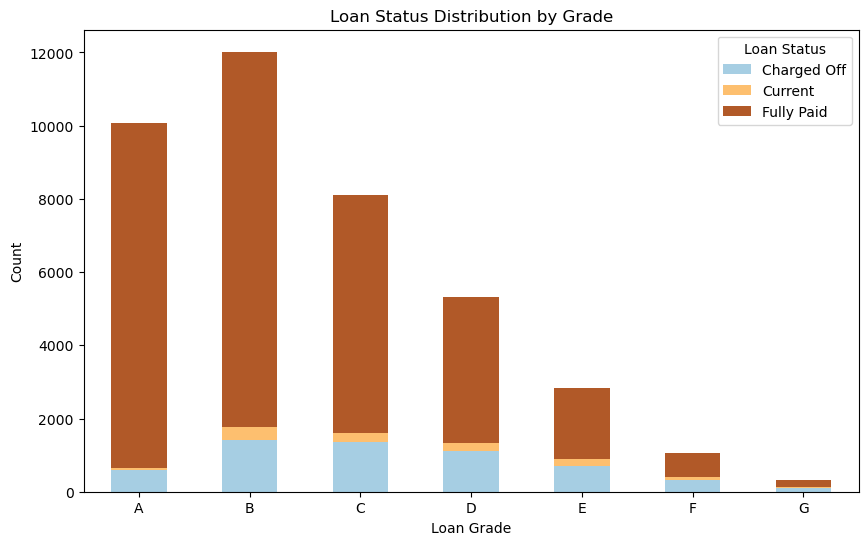

In [55]:
# Stacked Bar Plot: Loan Status by Grade

# Calculate loan status counts within each grade
grade_status = df.groupby(['grade', 'loan_status']).size().unstack().fillna(0)

# Plot the stacked bar chart
grade_status.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('Loan Status Distribution by Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=0)
plt.show()


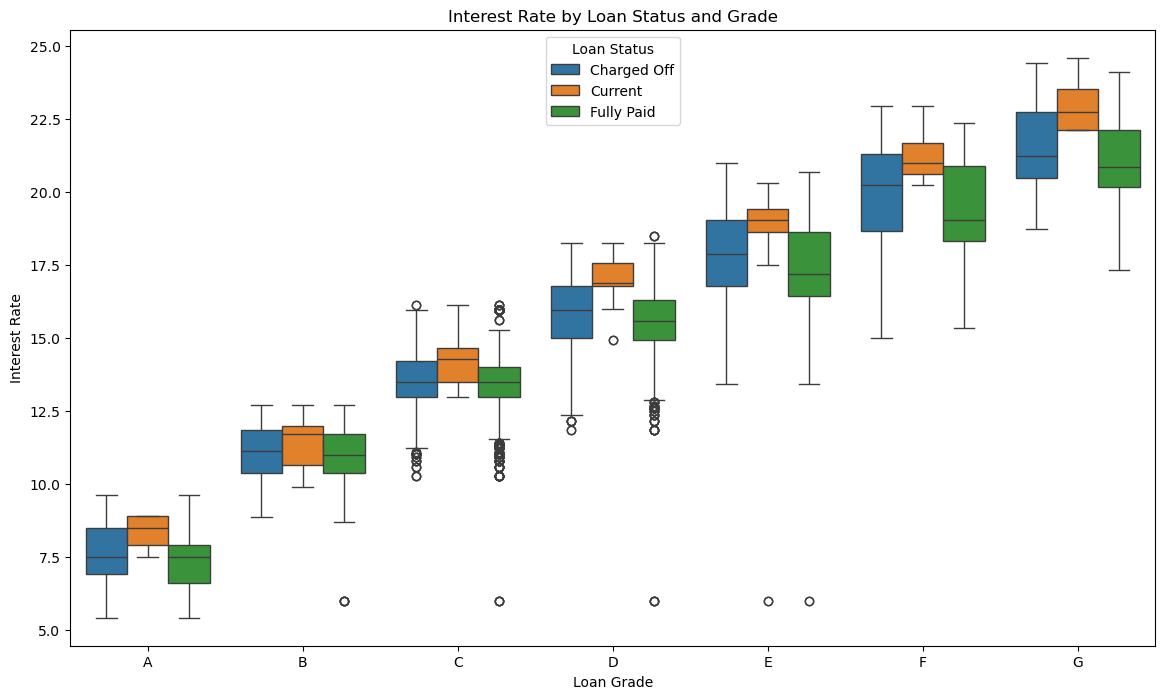

In [56]:
#  Box Plot: Interest Rate vs. Loan Status Segmented by Grade

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='grade', y='int_rate', hue='loan_status')
plt.title('Interest Rate by Loan Status and Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.legend(title='Loan Status', loc='upper center')
plt.show()

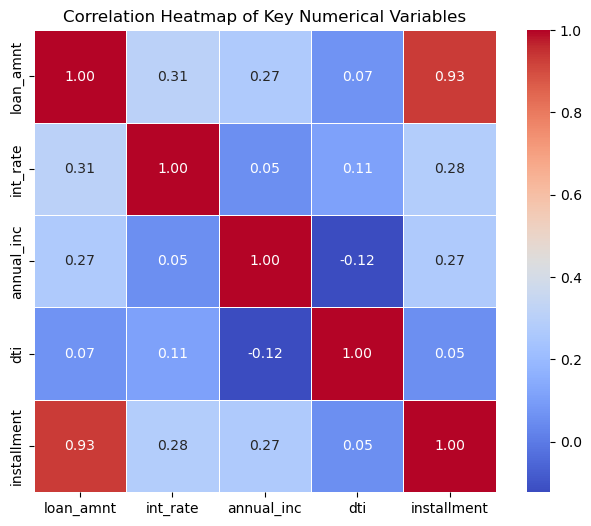

In [57]:
# Heatmap: Correlation between Key Numerical Variables

correlation_matrix = df[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'installment']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Key Numerical Variables')
plt.show()
